# Students Performance
_By: Samah Balkhair_

---

The dataset, StudentsPerformance.csv, a kaggle dataset 


## A. Import And Read the Dataset

In [1]:
#import the relevent libraries for data reading, cleaning, and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc # leanier regression


In [2]:
std_df = pd.read_csv('data/StudentsPerformance.csv')

In [3]:
std_df.shape

(1000, 8)

In [4]:
std_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


From the table above we found out there is no missing data in the table.

In [5]:
std_df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [6]:
std_df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


---
## B. Explor Columns

Explor the unique values in each columns

In [7]:
list(zip(std_df.columns, std_df.nunique()))

[('gender', 2),
 ('race/ethnicity', 5),
 ('parental level of education', 6),
 ('lunch', 2),
 ('test preparation course', 2),
 ('math score', 81),
 ('reading score', 72),
 ('writing score', 77)]

In [8]:
# Print the unique values of every column if the number of unique values in that column is 10 or less.
for col in std_df:
    if std_df[col].nunique() <= 10:
        print(col,std_df[col].unique())

gender ['female' 'male']
race/ethnicity ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch ['standard' 'free/reduced']
test preparation course ['none' 'completed']


In [9]:
std_df.gender.value_counts()

female    518
male      482
Name: gender, dtype: int64

---
## C. Data Preparation 
As we want to find the coloration between the overall score of the students and their gender, we will add additional colume in the students performance table which is the avarge score for the three subjects.

In [10]:
std_df['overall score']= std_df[['math score','reading score','writing score']].mean(axis=1)
std_df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333


Delete unnussary colum to reduce the complixity

In [11]:
std_df = std_df.drop(['race/ethnicity', 'parental level of education', 'lunch', 'test preparation course','math score', 'reading score', 'writing score'], axis = 1)
std_df.head(2)

,gender,overall score
0,female,72.666667
1,female,82.333333


Finally, before calculating some descriptive statistics, we will subset the data.

In [12]:
# Subset data
male = std_df.query('gender == "male"')['overall score']
female = std_df.query('gender == "female"')['overall score']

In [13]:
std_df.groupby('gender').describe()

overall score                                                    \
               count       mean        std   min        25%        50%   
gender                                                                   
female         518.0  69.569498  14.541809   9.0  60.666667  70.333333   
male           482.0  65.837483  13.698840  23.0  56.000000  66.333333   

                          
              75%    max  
gender                    
female  78.666667  100.0  
male    76.250000  100.0

Use Levene's test to  test if the two samples (male & female scores) have equal variances (homogeneity of variance)

In [15]:
sc.stats.levene(male, female)

LeveneResult(statistic=0.13445392794140468, pvalue=0.7139357521839773)

---
## D. Test and Visualize Distribution
perform an independent samples T-test with SciPy 

In [18]:
res = sc.stats.ttest_ind(male, female, 
                      equal_var=True)

res

Ttest_indResult(statistic=-4.169913529142, pvalue=3.311973638243664e-05)

<AxesSubplot:xlabel='gender', ylabel='overall score'>

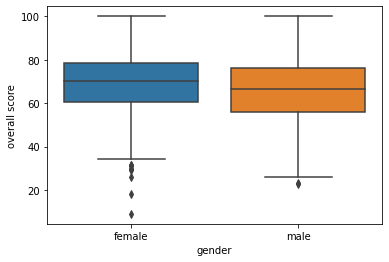

In [20]:
sns.boxplot(x='gender', y='overall score', data=std_df)

<AxesSubplot:xlabel='gender', ylabel='overall score'>

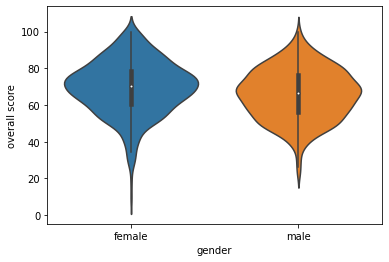

In [21]:
sns.violinplot(x='gender', y='overall score', data=std_df)

<AxesSubplot:xlabel='overall score', ylabel='Count'>

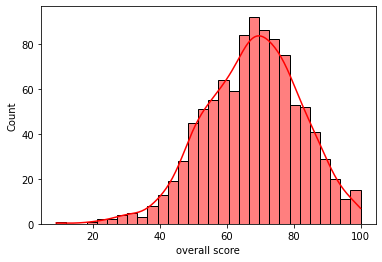

In [24]:
sns.histplot(data=std_df,x='overall score',bins=30,kde=True,color='r')

<AxesSubplot:xlabel='overall score', ylabel='Count'>

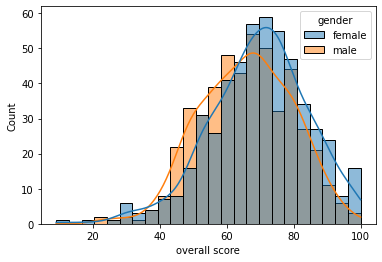

In [26]:
sns.histplot(data=std_df,x='overall score',kde=True,hue='gender')

---
## D. Conclusion

We tried to answer the following question: Is there a significant impact in the overall score for the student based on the student gender?

The p-value in the T-test that we performed is p-value = 3.3, which is  than the significance level alpha = 0.05.Form this result we conclude there is no significant difference in overall scor for male (M:65.8, SD:13.6) and female (M:69.5, SD:14.5)